# Instructions
- Some parts of the code are already done for you
- You need to execute all the cells
- You need to add the code where ever you see `"#### Add your code here ####"`
- Marks are mentioned along with the cells

# Face Mask Segmentation
Task is to predict the boundaries(mask) around the face in a given image.

## Dataset
Faces in images marked with bounding boxes. Have around 500 images with around 1100 faces manually tagged via bounding box.

### Mount Google drive if you are using google colab
- We recommend using Google Colab as you can face memory issues and longer runtimes while running on local

In [77]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Change current working directory to project folder (1 mark)

In [78]:
import os
import tensorflow
working_dir = './drive/My Drive/Datasets/'

### Load the "images.npy" file (2 marks)
- This file contains images with details of bounding boxes

In [79]:
import numpy as np
data = np.load(working_dir + 'face_mask_images.npy', allow_pickle=True)

### Check one sample from the loaded "images.npy" file  (2 marks)
Hint - print data[10][1] 

In [80]:
print("Image : ", data[10][1])

Image :  [{'label': ['Face'], 'notes': '', 'points': [{'x': 0.48, 'y': 0.10385756676557864}, {'x': 0.7716666666666666, 'y': 0.6795252225519288}], 'imageWidth': 600, 'imageHeight': 337}]


### Set image dimensions   (2 marks)
- Initialize image height, image width with value: 224 

In [81]:
IMAGE_WIDTH = 224
IMAGE_HEIGHT = 224

HIEGHT_CELLS = 224
WIDTH_CELLS = 224

### Create features and labels
- Here feature is the image
- The label is the mask
- Images will be stored in "X_train" array
- Masks will be stored in "masks" array

In [82]:
import cv2
from tensorflow.keras.applications.mobilenet import preprocess_input

masks = np.zeros((int(data.shape[0]), HIEGHT_CELLS, WIDTH_CELLS))
X = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH, 3))
for index in range(data.shape[0]):
    img = data[index][0]
    img = cv2.resize(img, dsize=(IMAGE_HEIGHT, IMAGE_WIDTH), interpolation=cv2.INTER_CUBIC)
    segimg = img = cv2.resize(img, dsize=(IMAGE_HEIGHT, IMAGE_WIDTH), interpolation=cv2.INTER_CUBIC)
    try:
      img = img[:, :, :3]
    except:
      continue
    X[index] = preprocess_input(np.array(img, dtype=np.float32))
    for i in data[index][1]:
        x1 = int(i["points"][0]['x'] * WIDTH_CELLS)
        x2 = int(i["points"][1]['x'] * WIDTH_CELLS)
        y1 = int(i["points"][0]['y'] * HIEGHT_CELLS)
        y2 = int(i["points"][1]['y'] * HIEGHT_CELLS)
        masks[index][y1:y2, x1:x2] = 1

### Print the shape of X_train and mask array  (2 marks)

In [83]:
print("Shape of X: ", X.shape)
# Total found 409 images with 224X224 with RGB color

Shape of X:  (409, 224, 224, 3)


In [84]:
print("Shape of mask", masks.shape)

Shape of mask (409, 224, 224)


### Print a sample image and image array

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  ...
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]]

 [[-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  ...
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]]

 [[-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  ...
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]]

 ...

 [[-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  ...
  [-0.96862745 -0.96862745 -0.96862745]
  [-0.96078432 -0.96078432 -0.96078432]
  [-0.96078432 -0.96078432 -0.96078432]]

 [

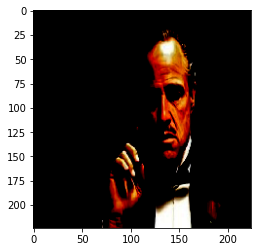

In [85]:
from matplotlib import pyplot
n = 10
print(X[n])
pyplot.imshow(X[n])

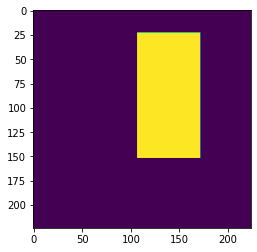

In [86]:
pyplot.imshow(masks[n])

## Create the model (10 marks)
- Add MobileNet as model with below parameter values
  - input_shape: IMAGE_HEIGHT, IMAGE_WIDTH, 3
  - include_top: False
  - alpha: 1.0
  - weights: "imagenet"
- Add UNET architecture layers
  - This is the trickiest part of the project, you need to research and implement it correctly

In [87]:
ALPHA = 1.0

In [88]:
# from tensorflow.keras.applications.mobilenet import MobileNet
# from tensorflow.keras.layers import Concatenate, UpSampling2D, Conv2D, Reshape
# from tensorflow.keras.models import Model


# def create_model(trainable=True):
#     model = MobileNet(input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3), include_top=False, alpha=ALPHA, weights="imagenet")
#     for layer in model.layers:
#         layer.trainable = trainable

#     block1 = model.get_layer("conv_pw_5_relu").output
#     block2 = model.get_layer("conv_pw_11_relu").output
#     block3 = model.get_layer("conv_pw_13_relu").output

#     x = Concatenate()([UpSampling2D()(block3), block2])
#     x = Concatenate()([UpSampling2D()(x), block1])

#     x = Conv2D(1, kernel_size=1, activation="sigmoid")(x)
#     x = Reshape((HIEGHT_CELLS, WIDTH_CELLS))(x)

#     return Model(inputs = model.input, outputs = x)

In [89]:
!pip install git+https://github.com/qubvel/segmentation_models

  Cloning https://github.com/qubvel/segmentation_models to /tmp/pip-req-build-m1jea_hd
  Running command git clone -q https://github.com/qubvel/segmentation_models /tmp/pip-req-build-m1jea_hd
  Running command git submodule update --init --recursive -q
  Created wheel for segmentation-models: filename=segmentation_models-1.0.1-cp36-none-any.whl size=33792 sha256=0e460a901108c4afda7af6a9346c7ba24144fa7759d74921235d390b0b231549
  Stored in directory: /tmp/pip-ephem-wheel-cache-cam2klxt/wheels/49/cf/46/cbb4bb64518c402aea99df9d466f1081450597e653256bbcf4
Successfully built segmentation-models


In [179]:
from segmentation_models import Unet
from tensorflow.keras.layers import Concatenate, UpSampling2D, Conv2D, Reshape
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input

N = X.shape[-1]
def create_model(trainable=True):
  model = Unet(backbone_name = 'resnet34', encoder_weights='imagenet', input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3))
  return model

### Call the create_model function

In [180]:
# Give trainable=False as argument, if you want to freeze lower layers for fast training (but low accuracy)
model = create_model(False)

# Print summary
model.summary()

Model: "model_10"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
data (InputLayer)               (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
bn_data (BatchNormalization)    (None, 224, 224, 3)  9           data[0][0]                       
__________________________________________________________________________________________________
zero_padding2d_155 (ZeroPadding (None, 230, 230, 3)  0           bn_data[0][0]                    
__________________________________________________________________________________________________
conv0 (Conv2D)                  (None, 112, 112, 64) 9408        zero_padding2d_155[0][0]         
___________________________________________________________________________________________

### Define dice coefficient function (10 marks)
- Create a function to calculate dice coefficient


In [92]:
def dice_coefficient(y_true, y_pred):
    numerator = 2 * tensorflow.reduce_sum(y_true * y_pred)
    denominator = tensorflow.reduce_sum(y_true + y_pred)
    return numerator / (denominator + tensorflow.keras.backend.epsilon())

### Define loss

In [93]:
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.backend import log, epsilon
def loss(y_true, y_pred):
    return binary_crossentropy(y_true, y_pred) - log(dice_coefficient(y_true, y_pred) + epsilon())

### Compile the model (3 marks)
- Complie the model using below parameters
  - loss: use the loss function defined above
  - optimizers: use Adam optimizer
  - metrics: use dice_coefficient function defined above

In [181]:
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.losses import binary_crossentropy

optimizer = Adam(lr = 1e-4, beta_1 = 0.9, beta_2 = 0.0999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss=loss, optimizer=optimizer, metrics=[dice_coefficient])

### Define checkpoint and earlystopping

In [95]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
checkpoint = ModelCheckpoint("model-{loss:.2f}.h5", monitor="loss", verbose=1, save_best_only=True,
                             save_weights_only=True, mode="min", period=1)
stop = EarlyStopping(monitor="loss", patience=5, mode="min")
reduce_lr = ReduceLROnPlateau(monitor="loss", factor=0.2, patience=5, min_lr=1e-6, verbose=1, mode="min")

### Fit the model (3 marks)
- Fit the model using below parameters
  - epochs: you can decide
  - batch_size: 1
  - callbacks: checkpoint, reduce_lr, stop

In [182]:
from segmentation_models import get_preprocessing

BACKBONE = 'resnet34'
preprocess_input = get_preprocessing(BACKBONE)
X = preprocess_input(X)

In [173]:
masks = masks.reshape(masks.shape[0], IMAGE_HEIGHT, IMAGE_WIDTH, 1)

In [189]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, masks, test_size=0.3, random_state=2)

In [183]:
model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=100, batch_size=34)

Train on 286 samples, validate on 123 samples
Epoch 1/100
286/286 [==============================] - 29s 102ms/step - loss: 2.0401 - dice_coefficient: 0.2098 - val_loss: 2.2486 - val_dice_coefficient: 0.2010
Epoch 2/100
286/286 [==============================] - 13s 44ms/step - loss: 1.6766 - dice_coefficient: 0.2825 - val_loss: 2.1927 - val_dice_coefficient: 0.1906
Epoch 3/100
286/286 [==============================] - 13s 44ms/step - loss: 1.4315 - dice_coefficient: 0.3403 - val_loss: 3.9799 - val_dice_coefficient: 0.0459
Epoch 4/100
286/286 [==============================] - 12s 44ms/step - loss: 1.2850 - dice_coefficient: 0.3811 - val_loss: 5.2974 - val_dice_coefficient: 0.0164
Epoch 5/100
286/286 [==============================] - 12s 44ms/step - loss: 1.2036 - dice_coefficient: 0.4065 - val_loss: 9.5910 - val_dice_coefficient: 0.0018
Epoch 6/100
286/286 [==============================] - 12s 44ms/step - loss: 1.1388 - dice_coefficient: 0.4303 - val_loss: 22.0400 - val_dice_coeffi

In [112]:
import matplotlib.pyplot as plt

In [113]:
print(X_train.shape)
print(masks.shape)

(286, 224, 224, 3)
(409, 224, 224, 1)


### Get the predicted mask for a sample image   (5 marks)

In [208]:
n = 145
sample_image = X_train[n]
#pred_mask = cv2.resize(1.0*(model.predict(x=np.array([sample_image]))[0] > 0.5), (IMAGE_WIDTH, IMAGE_HEIGHT))
pred_mask = model.predict(sample_image.reshape((1,IMAGE_HEIGHT, IMAGE_WIDTH, 3)))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


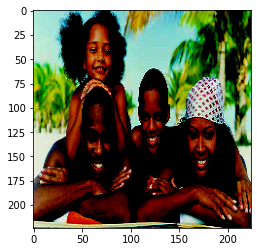

In [209]:
plt.imshow(sample_image)

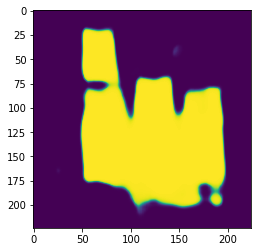

In [210]:
prediction = pred_mask.reshape(pred_mask.shape[1:-1])
plt.imshow(prediction)

[### Impose the mask on the image (5 marks)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


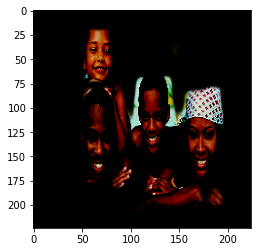

In [211]:
image2 = sample_image
image2[:, :, 0] = prediction*sample_image[:, :, 0]
image2[:, :, 1] = prediction*sample_image[:, :, 1]
image2[:, :, 2] = prediction*sample_image[:, :, 2]

out_image = image2
plt.imshow(out_image)